In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
print("Libs loaded.")

Libs loaded.


1. Napisz własną funkcję lub skrypt obliczający histogram. Narysuj histogram dla każdego obrazu. Porównaj wykres z histogramem otrzymanym funkcją biblioteczną w wybranej platformie lub języku programowania. Na podstawie treści wybranych obrazów, wyjaśnij otrzymane kształty histogramów. (0.2pkt)

In [2]:
image_bird_path = "images/bird.jpg"
image_space_rover_path = "images/space_rover.jpg"

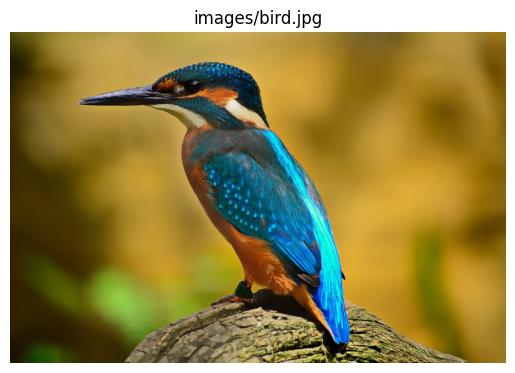

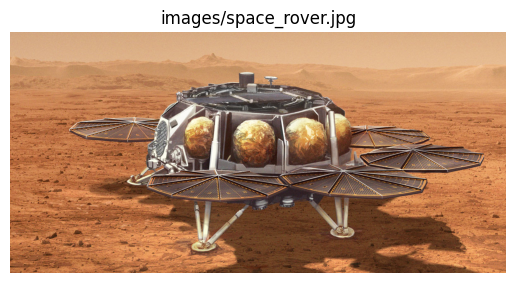

In [3]:
image_bird = cv2.imread(image_bird_path)
image_space_rover = cv2.imread(image_space_rover_path)

plt.imshow(cv2.cvtColor(image_bird, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(f"{image_bird_path}")
plt.show()

plt.imshow(cv2.cvtColor(image_space_rover, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(f"{image_space_rover_path}")
plt.show()

In [4]:
def embedded_function_histograms(image_path):
    image = cv2.imread(image_path)

    color = ('b','g','r')

    for i, col in enumerate(color):
        histr = cv2.calcHist([image], [i] , None, [256], [0,256])
        plt.plot(histr, color = col)
        plt.xlim([0,256])

    plt.title(f'Image histogram  - {image_path}')
    plt.xlabel('Intensity per pixel')
    plt.ylabel('Number of pixels')
    plt.show()

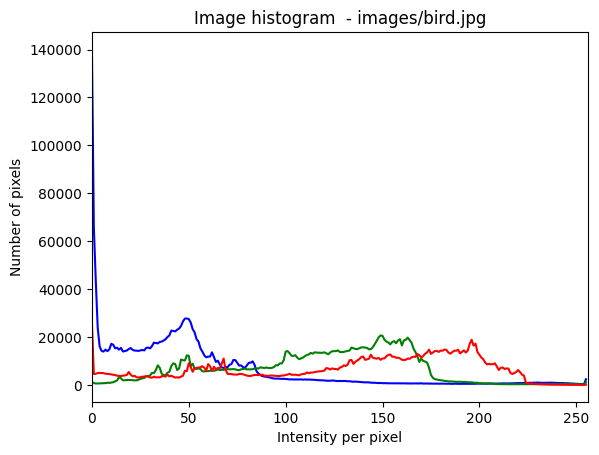

In [5]:
embedded_function_histograms(image_bird_path)

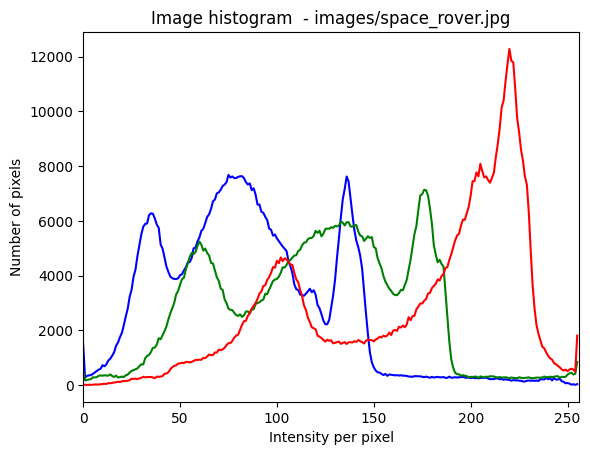

In [6]:
embedded_function_histograms(image_space_rover_path)

In [7]:
def custom_histogram(image_path):
    image = plt.imread(image_path)
    histogram = {0: np.zeros(256), 1: np.zeros(256), 2: np.zeros(256)}  # r, g, b
    for row in image:
        for pixel in row:
            for i in range(3):
                histogram[i][pixel[i]] += 1
    return histogram

def draw_histogram(image_path):
    histogram = custom_histogram(image_path)
    colors = ['red', 'green', 'blue']
    for i, col in enumerate(colors):
        plt.plot(histogram[i], color=col)
    plt.title(f'Image histogram - {image_path}')
    plt.xlabel('Intensity per pixel')
    plt.ylabel('Number of pixels')
    plt.show()

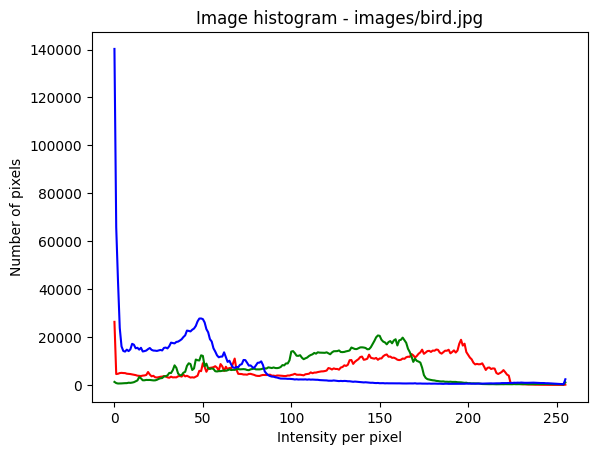

In [8]:
draw_histogram(image_bird_path)

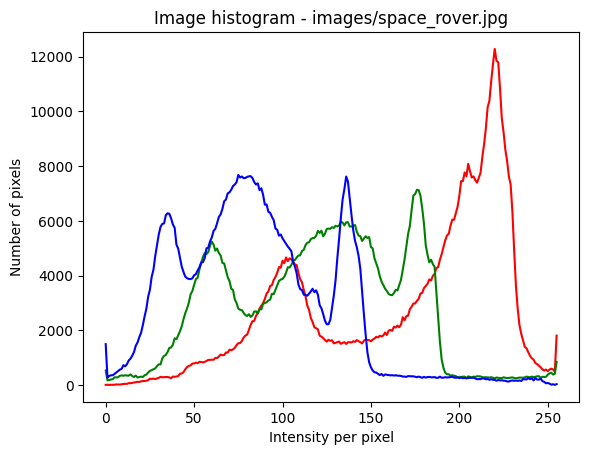

In [9]:
draw_histogram(image_space_rover_path)

2. Napisz własną funkcję lub skrypt zmieniający każdy z wybranych obrazów na monochromatyczny korzystając ze wzoru na luminancję. Porównaj otrzymane obrazy z obrazami otrzymanymi funkcjami bibliotecznymi w wybranej platformie lub języku programowania. (0.2pkt)
L =  0.2989 * R + 0.5870 * G + 0.1140 * B

In [10]:
image_clock_path = "images/clock.jpg"
image_fly_path = "images/fly.jpg"

In [11]:
def embedded_convert_to_gray(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    plt.axis('off')
    plt.show()

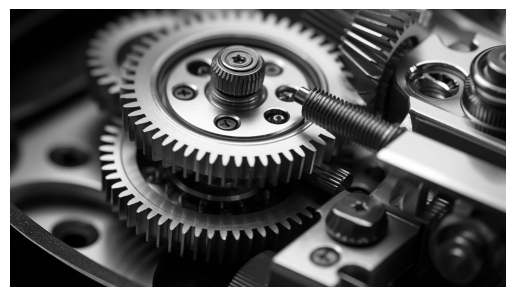

In [12]:
embedded_convert_to_gray(image_clock_path)

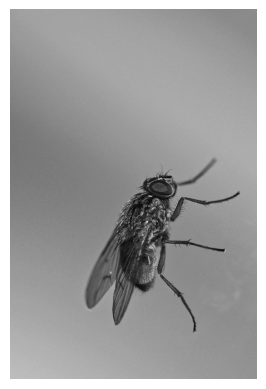

In [13]:
embedded_convert_to_gray(image_fly_path)

In [14]:
def convert_to_gray(image_path):
    image = cv2.imread(image_path)
    gray_image = 0.2989 * image[:, :, 0] + 0.5870 * image[:, :, 1] + 0.1140 * image[:, :, 2]
    gray_image = gray_image.astype('uint8')

    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')
    plt.show()
    return gray_image

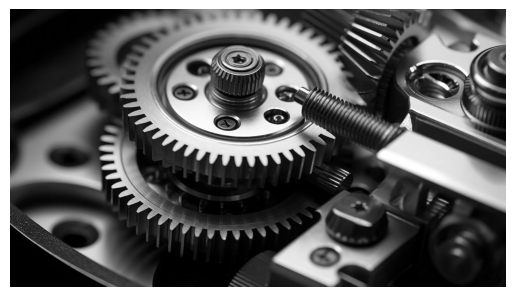

In [15]:
image_gray_clock = convert_to_gray(image_clock_path)

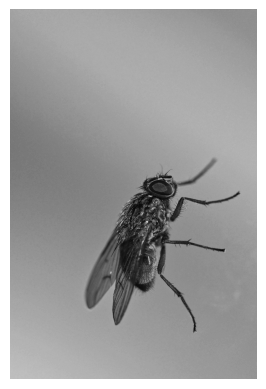

In [16]:
image_gray_fly = convert_to_gray(image_fly_path)

3. Dla otrzymanych w pkt.2 obrazów monochromatycznych narysuj ich histogramy. Analizując kształt histogramu i treść obrazu zaproponuj lub oblicz wartość progową, którą wykorzystaj do zamiany obrazu na binarny. Porównaj działanie własnej funkcji z funkcjami bibliotecznymi. (0.2pkt)

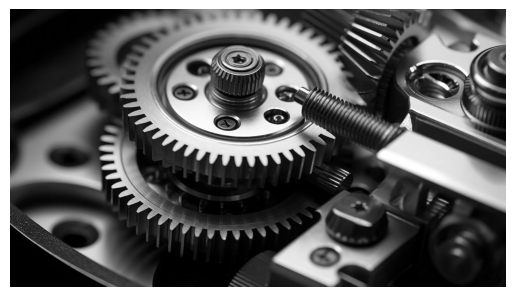

In [17]:
plt.imshow(image_gray_clock, cmap='gray')
plt.axis('off')
plt.show()

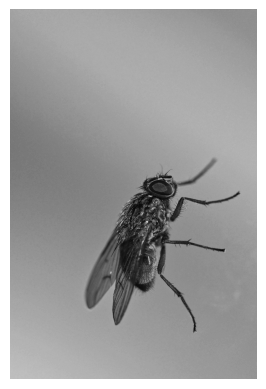

In [18]:
plt.imshow(image_gray_fly, cmap='gray')
plt.axis('off')
plt.show()

In [19]:
def draw_histogram_monochromatic(gray_image, name):
    histr = cv2.calcHist([gray_image], [0], None, [256], [0,256])
    plt.plot(histr)
    plt.xlim([0, 256])
    plt.title(f'Image histogram - {name}')
    plt.xlabel('Intensity per pixel')
    plt.ylabel('Number of pixels')
    plt.show()

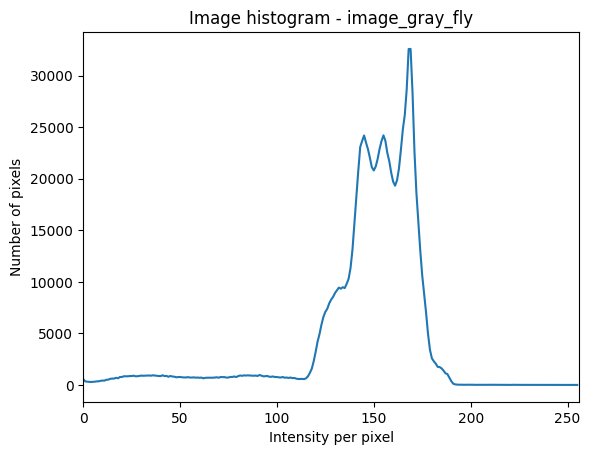

In [20]:
draw_histogram_monochromatic(image_gray_fly, "image_gray_fly")

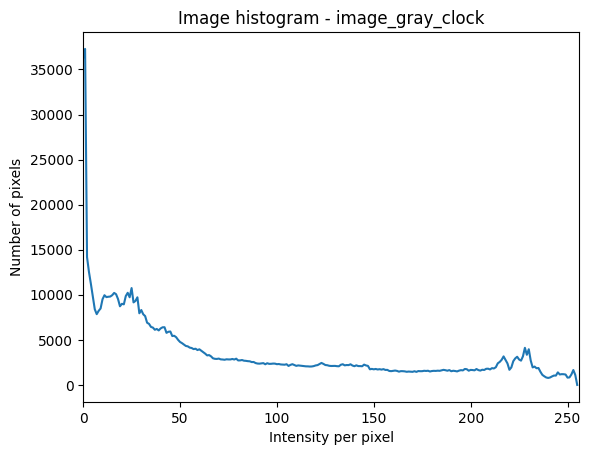

In [21]:
draw_histogram_monochromatic(image_gray_clock, "image_gray_clock")

In [22]:
def binarize_image(gray_image, name):
    # https://en.wikipedia.org/wiki/Otsu%27s_method
    # https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
    otsu_threshold, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    plt.imshow(binary_image, cmap='gray')
    plt.axis('off')
    plt.title(f'Image - {name}')
    plt.show()
    return otsu_threshold

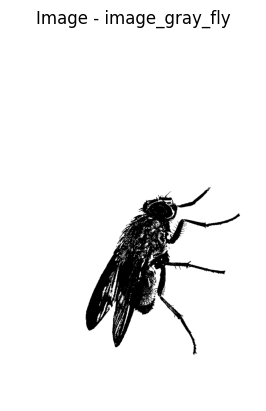

In [23]:
threshold_fly = binarize_image(image_gray_fly, "image_gray_fly")

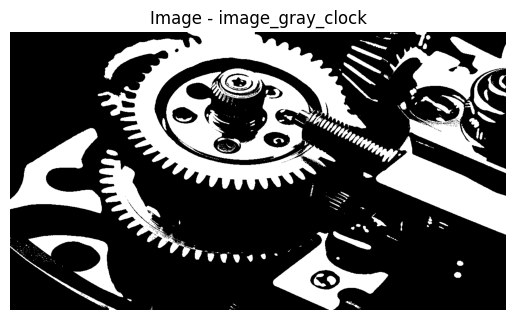

In [24]:
threshold_clock = binarize_image(image_gray_clock, "image_gray_clock")

In [25]:
def embedded_binarize_image(gray_image, threshold_value, name):
    binary_image = np.zeros_like(gray_image)

    rows, cols = gray_image.shape
    for i in range(rows):
        for j in range(cols):
            if gray_image[i, j] > threshold_value:
                binary_image[i, j] = 255
            else:
                binary_image[i, j] = 0

    plt.imshow(binary_image, cmap='gray')
    plt.title(f'Binary Image - {name}')
    plt.axis('off')
    plt.show()

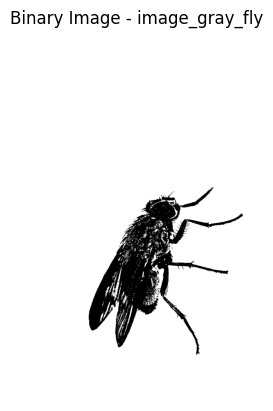

In [26]:
embedded_binarize_image(gray_image=image_gray_fly, threshold_value=threshold_fly, name="image_gray_fly")

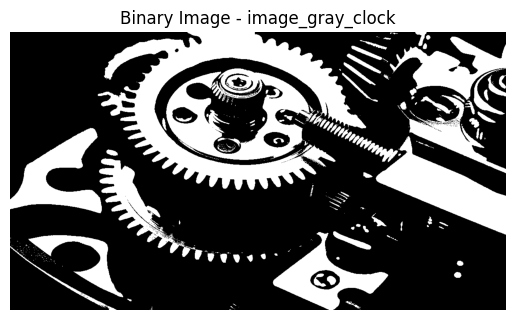

In [27]:
embedded_binarize_image(gray_image=image_gray_clock, threshold_value=threshold_clock, name="image_gray_clock")

4. Napisz własną funkcję lub skrypt tworzący macierz LUT z wybraną funkcją odwzorowującą (log, gamma, przedziałami liniowe,…). Wykorzystaj macierz LUT do modyfikacji obrazu RGB i monochromatycznego. (0.4pkt)

In [28]:
image_brocoli_path = "images/brocoli.jpg"
image_dog_path = "images/dog.jpg"

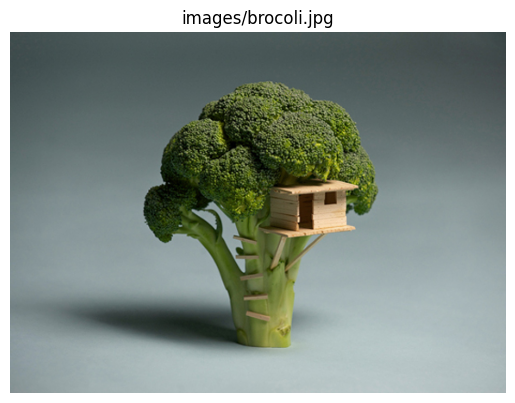

In [29]:
image_brocoli = cv2.imread(image_brocoli_path)

image_brocoli_rgb = cv2.cvtColor(image_brocoli, cv2.COLOR_BGR2RGB)

plt.imshow(image_brocoli_rgb)
plt.axis("off")
plt.title(f"{image_brocoli_path}")
plt.show()

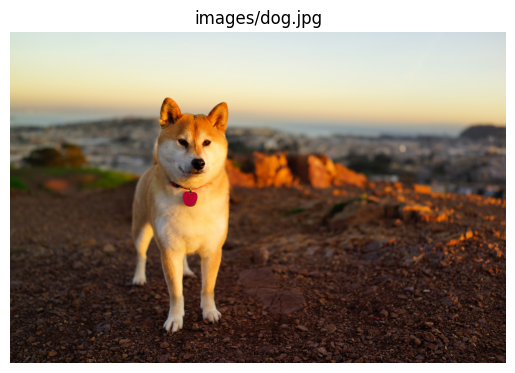

In [30]:
image_dog = cv2.imread(image_dog_path)

image_dog_rgb = cv2.cvtColor(image_dog, cv2.COLOR_BGR2RGB)

plt.imshow(image_dog_rgb)
plt.axis("off")
plt.title(f"{image_dog_path}")
plt.show()

In [38]:
def log_function(x, c):
    return c * np.log(1 + x)

def lin_function(x, c):
    return c * x

# def exponential_function(x, c, a, b):
#     return c * (a ** (b * x))
#
# def power_function(x, c, gamma):
#     return c * (x**gamma)

In [39]:
def create_LUT_table_GRAY(log_func, c=1):
    # https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#lut
    lut = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        lut[i] = log_func(i, c)
    return lut

def use_LUT_matrix_GRAY(image, LUT_matrix):
    return cv2.LUT(image, LUT_matrix)

def make_lookup_GRAY(image, name):
    lut = create_LUT_table_GRAY(log_func=log_function)
    processed_image = use_LUT_matrix_GRAY(image, lut)
    plt.imshow(processed_image, cmap='gray')
    plt.title(f'LUTed Image - {name}')
    plt.show()

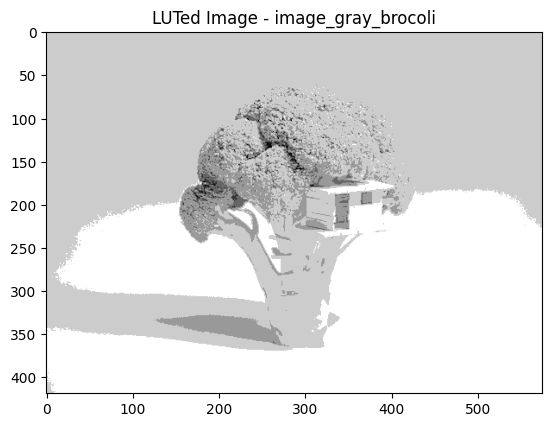

In [40]:
image_gray_brocoli = cv2.cvtColor(image_brocoli_rgb, cv2.COLOR_BGR2GRAY)

make_lookup_GRAY(image_gray_brocoli, "image_gray_brocoli")

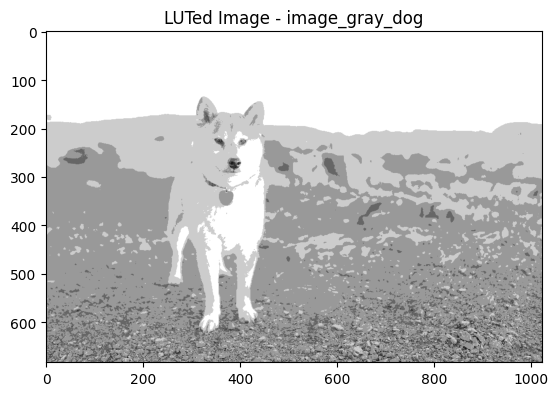

In [41]:
image_gray_dog = cv2.cvtColor(image_dog_rgb, cv2.COLOR_BGR2GRAY)

make_lookup_GRAY(image_gray_dog, "image_gray_dog")

In [70]:
def create_LUT_table_RGB(func, c=1.1):
    lut = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        lut[i] = func(i, c)
    return lut

def apply_LUT_RGB(image, LUT_function):
    result_image = np.zeros_like(image)
    for i in range(3):  # for each canal R G B
        result_image[:,:,i] = cv2.LUT(image[:,:,i], LUT_function)
    return result_image

def make_lookup_RGB(image, name):
    lut = create_LUT_table_RGB(func=lin_function)
    processed_image = apply_LUT_RGB(image, lut)
    plt.imshow(processed_image)
    plt.title(f'LUTed Image - {name}')
    plt.show()

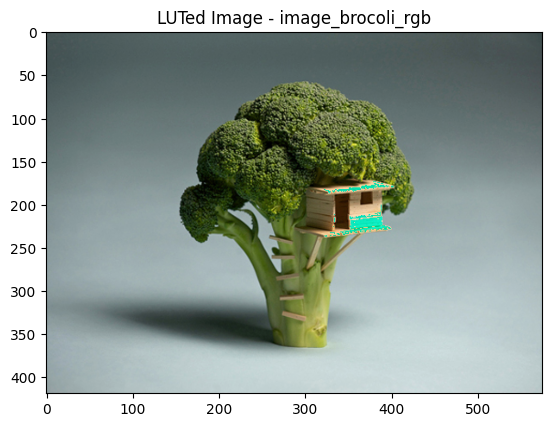

In [71]:
make_lookup_RGB(image_brocoli_rgb, "image_brocoli_rgb")

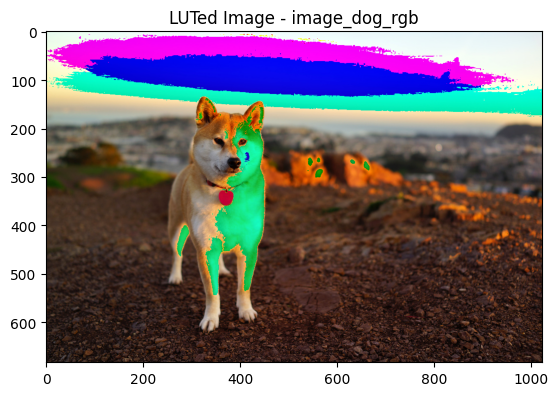

In [72]:
make_lookup_RGB(image_dog_rgb, "image_dog_rgb")